In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
adata = sc.read("/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas_final.h5ad")
sc.settings.figdir = '../results/figures/'

In [21]:
gene_list = pd.read_csv('/mnt/c/Users/sneha/OneDrive/Desktop/gene expression matrices human/genes-rows.csv')
target_genes = gene_list['gene'].tolist() #extract one column as list i.e gene symbol from df
gene_present = [g for g in target_genes if g in adata.raw.var_names] #check which genes are present in the dataframe index
gene_missing = [g for g in target_genes if  g not in adata.raw.var_names]
print(f"Number of genes present: {len(gene_present)} out of {len(target_genes)} genes")
#print(f"Missing genes: {gene_missing}")
top_genes = gene_present[:20]
print(f"Top genes: {top_genes}")
# Look for specific genes known for language disorders
language_keywords = ['FOXP2', 'CNTNAP2', 'ROBO', 'DYX', 'KIAA', 'DCDC2']
language_genes = [g for g in gene_present if any(keyword in g.upper() for keyword in language_keywords)]
print(f"Language-related genes found: {language_genes}")

Number of genes present: 3000 out of 50281 genes
Top genes: ['A2M', 'AASS', 'ABCA1', 'ABCA13', 'ABCA2', 'ABCA8', 'ABCC4', 'ABCD3', 'ABCG1', 'ABCG2', 'ABHD3', 'ABI3', 'ACER3', 'ACOX2', 'ACPP', 'ACSF2', 'ACSL1', 'ACSM5', 'ACSS1', 'ACTBL2']
Language-related genes found: ['KIAA0226L', 'KIAA1033', 'KIAA1147', 'KIAA1551', 'KIAA1598', 'KIAA1755', 'ROBO1', 'ROBO2']


In [22]:
# Get mean expression for each gene
import numpy as np
mean_expr = np.array(adata[:, gene_present].X.mean(axis=0)).flatten()

# Get top 20 most highly expressed dyslexia genes
top_indices = np.argsort(mean_expr)[-20:][::-1]  # Top 20, descending
top_genes = [gene_present[i] for i in top_indices]
print(f"Top 20 most expressed dyslexia genes: {top_genes}")

Top 20 most expressed dyslexia genes: ['SNORD115@', 'DST', 'PCDH9', 'PCLO', 'FTH1', 'TSPAN7', 'CLK1', 'RNR2', 'ITM2B', 'MACF1', 'CHN1', 'SF3B1', 'SPARCL1', 'VSNL1', 'SERINC1', 'LSAMP', 'PHIP', 'GABRA1', 'ZFYVE16', 'GOLGB1']


Plotting 8 language-related genes


/tmp/ipykernel_150241/1197216287.py:7: FutureWarning: Argument `save` is deprecated and will be removed in a future version. Use `sc.pl.plot(show=False).figure.savefig()` instead.
  sc.pl.dotplot(adata, var_names=language_genes, groupby='sample_id', save='language_genes_dotplot.pdf')


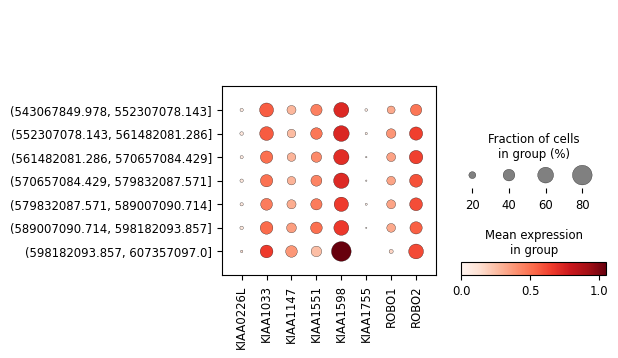

/tmp/ipykernel_150241/1197216287.py:8: FutureWarning: Argument `save` is deprecated and will be removed in a future version. Use `sc.pl.plot(show=False).figure.savefig()` instead.
  sc.pl.stacked_violin(adata, var_names=language_genes, groupby='sample_id', save='language_genes_violin.pdf')


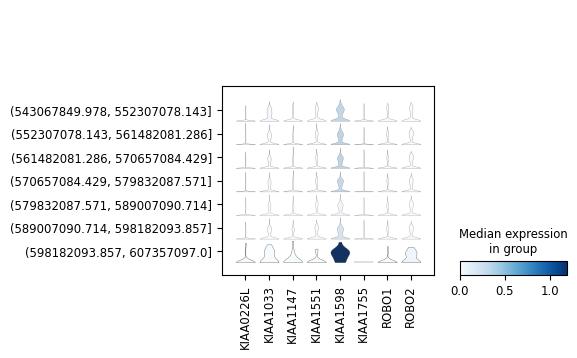

Plotting top 20 expressed dyslexia genes


/tmp/ipykernel_150241/1197216287.py:13: FutureWarning: Argument `save` is deprecated and will be removed in a future version. Use `sc.pl.plot(show=False).figure.savefig()` instead.
  sc.pl.dotplot(adata, var_names=top_genes, groupby='sample_id', save='top_dyslexia_genes_dotplot.pdf')


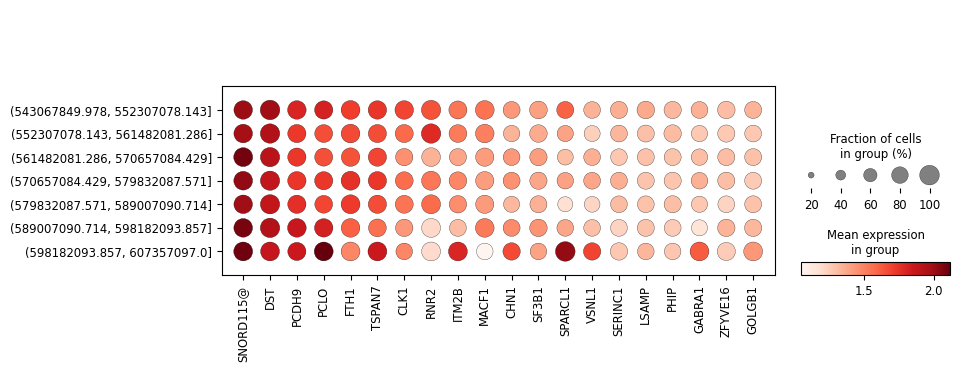

Creating heatmap for all 3000 dyslexia genes


/tmp/ipykernel_150241/1197216287.py:17: FutureWarning: Argument `save` is deprecated and will be removed in a future version. Use `sc.pl.plot(show=False).figure.savefig()` instead.
  sc.pl.heatmap(adata, var_names=gene_present, groupby='sample_id', save='all_dyslexia_genes_heatmap.pdf', show_gene_labels=False)


KeyboardInterrupt: 

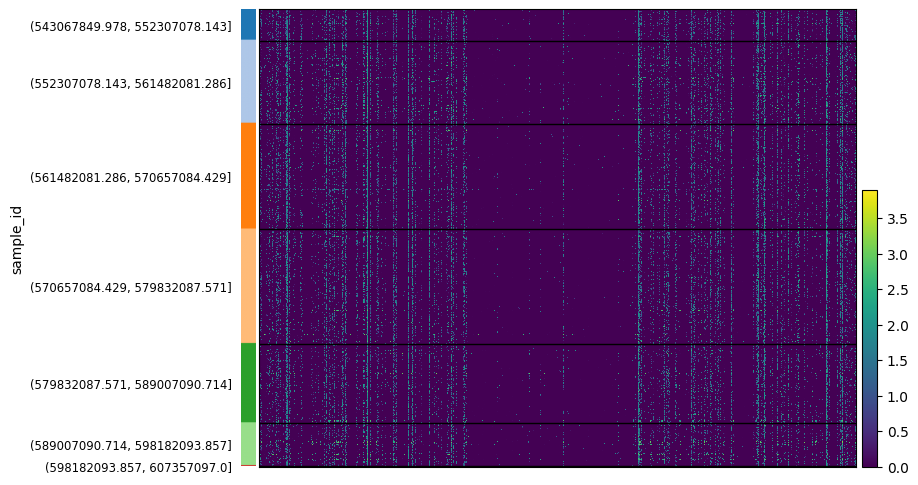

In [23]:
# Set figure directory
sc.settings.figdir = '../results/figures/'

# 1. Plot the known language-related genes (small set, use dotplot/violin)
language_genes = ['KIAA0226L', 'KIAA1033', 'KIAA1147', 'KIAA1551', 'KIAA1598', 'KIAA1755', 'ROBO1', 'ROBO2']
print(f"Plotting {len(language_genes)} language-related genes")
sc.pl.dotplot(adata, var_names=language_genes, groupby='sample_id', save='language_genes_dotplot.pdf')
sc.pl.stacked_violin(adata, var_names=language_genes, groupby='sample_id', save='language_genes_violin.pdf')

# 2. Plot top 20 most expressed dyslexia genes
top_genes = ['SNORD115@', 'DST', 'PCDH9', 'PCLO', 'FTH1', 'TSPAN7', 'CLK1', 'RNR2', 'ITM2B', 'MACF1', 'CHN1', 'SF3B1', 'SPARCL1', 'VSNL1', 'SERINC1', 'LSAMP', 'PHIP', 'GABRA1', 'ZFYVE16', 'GOLGB1']
print(f"Plotting top {len(top_genes)} expressed dyslexia genes")
sc.pl.dotplot(adata, var_names=top_genes, groupby='sample_id', save='top_dyslexia_genes_dotplot.pdf')

# 3. Heatmap for all 3000 genes (overview)
print(f"Creating heatmap for all {len(gene_present)} dyslexia genes")
sc.pl.heatmap(adata, var_names=gene_present, groupby='sample_id', save='all_dyslexia_genes_heatmap.pdf', show_gene_labels=False)

In [ ]:
# Load the file you saved AFTER doing clustering/UMAP
adata = sc.read('/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas_final.h5ad')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=25)
sc.tl.umap(adata)

print(adata.obsm.keys())

#umap plot for top 5 language genes
for gene in language_genes[:5]:
    sc.pl.umap(adata, color=gene, use_raw=True,save=f'_{gene}_expression.pdf') 
    

KeysView(AxisArrays with keys: X_pca, X_umap)


In [ ]:
expr_df = pd.DataFrame(adata.raw[:, gene_present].X.toarray(), columns=gene_present, index=adata.obs.index)
expr_df ['cell_type'] = adata.obs['sample_id'].values
mean_expr = expr_df.groupby('cell_type')[gene_present].mean()
mean_expr.to_csv('../results/mean_expression_by_cell_type.csv')   

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(mean_expr.T, cmap='viridis', cbar_kws={'label': 'Mean log(CPM + 1)'})
plt.title('Dyslexia-Associated Gene Expression Across Cell Types')
plt.tight_layout()
plt.savefig('../results/figures/dyslexia_genes_heatmap.pdf')